# Programming Assignment 2: Random forests

**Group 15:** 
*Sarvesh Meenowa, Neha Devi Shakya, Khushi Chitra Uday*

In [ ]:
# import relevant libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font', size = 12) # set plot font size

import seaborn as sns
sns.set(font_scale = 1.2)

from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

import time

## Task 1: Working with a dataset with categorical features

### Step 1. Reading the data

In [ ]:
# load train data
train_df = pd.read_csv("data/adult_train.csv")
train_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
1,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
4,45,Private,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K


In [ ]:
# load test data
test_df = pd.read_csv("data/adult_test.csv")
test_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# check for missing values
train_df.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [ ]:
# check for missing values
test_df.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [ ]:
# shuffle the datasets
train_data_shuffled = train_df.sample(frac = 1.0, random_state=0)
test_data_shuffled = test_df.sample(frac = 1.0, random_state=0)

In [ ]:
# Split into input part X and output part Y.
X_train = train_data_shuffled.drop("target", axis=1)
X_test = test_data_shuffled.drop("target", axis=1)

Y_train = train_data_shuffled["target"].dropna() 
Y_test = test_data_shuffled["target"].dropna()

### Step 2: Encoding the features as numbers.

In [ ]:
# convert data from dataframe to dictionary
dicts_for_my_training_data = X_train.to_dict("records")
dicts_for_my_test_data = X_test.to_dict("records")

In [ ]:
# peek at representation of first individual
dicts_for_my_training_data[0]

{'age': 49,
 'capital-gain': 0,
 'capital-loss': 0,
 'education': 'HS-grad',
 'education-num': 9,
 'hours-per-week': 40,
 'marital-status': 'Married-civ-spouse',
 'native-country': 'United-States',
 'occupation': 'Transport-moving',
 'race': 'White',
 'relationship': 'Husband',
 'sex': 'Male',
 'workclass': 'Local-gov'}

In [ ]:
# Encoding features as numbers using DictVectorizer
dv = DictVectorizer()

In [ ]:
'''
The method fit_transform will first call fit, which as usual is the "training"
method. For a DictVectorizer, "training" consists of building the mapping from 
categories to column positions. Then, the transform method will be called, 
which converts the data into a matrix
'''

X_train_encoded = dv.fit_transform(dicts_for_my_training_data) 

In [ ]:
# Creating and validating a Gradient Boosting Classifer on the data
clf = GradientBoostingClassifier()

clf.fit(X_train_encoded, Y_train)

Y_pred = clf.predict(X_train_encoded)

clf_acc_score = accuracy_score(Y_train, Y_pred)

clf_mean_score = np.mean(cross_val_score(clf, X_train_encoded, Y_train, cv = 5))

print(f"Gradient Boosting Classifier:\nAccuracy Score: {clf_acc_score}\nMean Score: {clf_mean_score}")

Gradient Boosting Classifier:
Accuracy Score: 0.868769386689598
Mean Score: 0.865636879708736


### Step 3 : Combining the steps.

In [ ]:
pipeline = make_pipeline(DictVectorizer(), GradientBoostingClassifier())

In [ ]:
# fit pipeline
pipeline.fit(dicts_for_my_training_data, Y_train)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [ ]:
Y_pred = pipeline.predict(dicts_for_my_test_data)

In [ ]:
pipeline_acc_score = accuracy_score(Y_test, Y_pred)
print(f"Gradient Bossting Classifier Pipeline:\nAccuracy Score: {pipeline_acc_score}")

Gradient Bossting Classifier Pipeline:
Accuracy Score: 0.8711381364781033


## Task 2 : Decision trees and random forests

### Underfitting and overfitting in decision tree classifiers.

In [ ]:
def find_max_depth(depth_range, criterion):
    max_depth_list = list(range(1, depth_range))

    train_scores = [] #training scores for each model
    test_scores = [] # testing scores for each model
    
    for x in max_depth_list:
        pipeline = make_pipeline(DictVectorizer(), DecisionTreeClassifier(max_depth = x, criterion = criterion))
        start_train = time.time()
        pipeline.fit(dicts_for_my_training_data, Y_train)
        train_scores.append(accuracy_score(Y_train, pipeline.predict(dicts_for_my_training_data)))
        test_scores.append(accuracy_score(Y_test, pipeline.predict(dicts_for_my_test_data)))

    return (train_scores, test_scores)

In [ ]:
# Append the scores from applying the model with parameter max_depth(1-30) for criterion
depth_range = 31

entropy_scores = find_max_depth(depth_range, "entropy")
gini_scores = find_max_depth(depth_range, "gini")

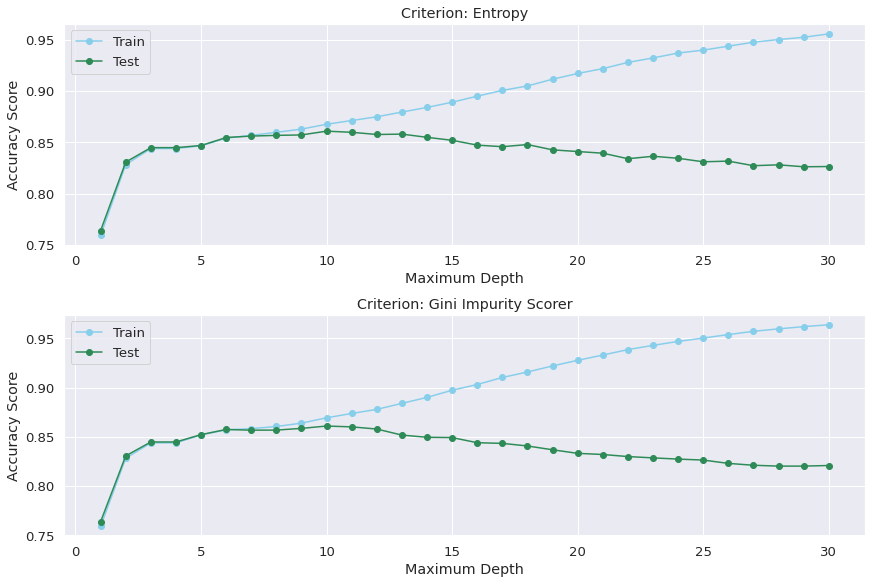

In [ ]:
x = np.arange(1, depth_range) # Create domain for plot

# create subplots and figure size
fig, ax = plt.subplots(2, figsize = (12, 8), constrained_layout = True)


# create line plot for entropy criterion
ax[0].plot(x, entropy_scores[0], label = "Train", color = "skyblue", marker = "o", markerfacecolor = "skyblue") # Plot training score over domain
ax[0].plot(x, entropy_scores[1], label = "Test", color = "seagreen", marker = "o", markerfacecolor = "seagreen") # Plot testing accuracy over domain

# Set sub-plot title and axis labels
ax[0].set_title("Criterion: Entropy")
ax[0].set_xlabel("Maximum Depth")
ax[0].set_ylabel("Accuracy Score")

# Add sub-plot legend
ax[0].legend()

# Add grid lines
# ax[0].grid(axis = "x")
# ax[0].grid(axis = "y")
ax[0].grid(True)


# create line plot for gini criterion
ax[1].plot(x, gini_scores[0], label = "Train", color = "skyblue", marker = "o", markerfacecolor = "skyblue") # Plot training score over domain
ax[1].plot(x, gini_scores[1], label = "Test", color = "seagreen", marker = "o", markerfacecolor = "seagreen") # Plot testing accuracy over domain

# Set sub-plot title and axis labels
ax[1].set_title("Criterion: Gini Impurity Scorer")
ax[1].set_xlabel("Maximum Depth")
ax[1].set_ylabel("Accuracy Score")

# Add sub-plot legend
ax[1].legend()

# Add grid lines
ax[1].grid(axis = "x")
ax[1].grid(axis = "y")
ax[1].grid(True)



In [ ]:
print(f"Entropy Scorer:\nMax Depth: {entropy_scores[1].index(max(entropy_scores[1])) + 1}, Test Score: {max(entropy_scores[1])}\n")
print(f"Gini Scorer:\nMax Depth: {gini_scores[1].index(max(gini_scores[1])) + 1},  Test Score: {max(gini_scores[1])}")

Entropy Scorer:
Max Depth: 10, Test Score: 0.8608807812787912

Gini Scorer:
Max Depth: 10,  Test Score: 0.8610036238560285


For the plots, we can identify that the model starts to overfit the data at around the max_depth parameter value of 10 for the classifier for both scorers.

Do you see a similar effect now?

> There is a similar effect in terms of the generalisation gap. In the previous assignment(task 4), we were solving a regression hence using an evaluation metric such mean squared error, which was increasing in the test set as the number of max depth was increasing. In this assignment, we are solving a classification; hence, we use accuracy as the evaluation metric. We observe that the generalisation gap between the test and training accuracy increases and a drop in accuracy as the number of max_depth values increases.

### Underfitting and overfitting in random forest classifiers.

In [ ]:
def find_max_depth_rf(depth_range, n_estimators):
    max_depth_list = list(range(1, depth_range))

    train_scores = [] # Log training cross validation scores for each model
    test_scores = [] # Log testing cross validation scores for each model
    train_time = []
    for x in max_depth_list:
      pipeline = make_pipeline(DictVectorizer(), RandomForestClassifier(max_depth = x, n_estimators = n_estimators, n_jobs = -1))
      start_train = time.time()
      pipeline.fit(dicts_for_my_training_data, Y_train)
      stop_train = time.time()
      train_time.append(stop_train - start_train)
      train_scores.append(accuracy_score(Y_train, pipeline.predict(dicts_for_my_training_data)))
      test_scores.append(accuracy_score(Y_test, pipeline.predict(dicts_for_my_test_data)))
    
    return (train_scores, test_scores,train_time)

In [ ]:
rf_scores = find_max_depth_rf(31, 1)

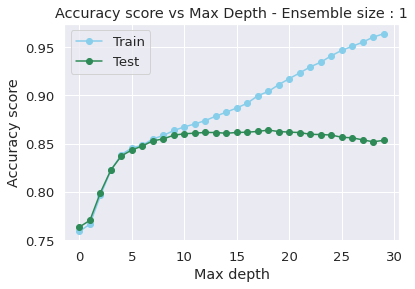

In [ ]:
x = np.arange(30) # Create domain for plot
plt.rc("font", size = 12) # Set font size to 12

plt.plot(x, rf_scores[0], label = 'Train', color = 'skyblue', marker = 'o', markerfacecolor = 'skyblue') # Plot training score over domain
plt.plot(x, rf_scores[1], label = 'Test', color = 'seagreen', marker = 'o', markerfacecolor = 'seagreen') # Plot testing accuracy over domain
plt.title('Accuracy score vs Max Depth - Ensemble size : 1')
plt.xlabel('Max depth') # Label x-axis
plt.ylabel('Accuracy score') # Label y-axis
plt.legend() # Show plot labels as legend
# plt.grid(axis = "x")
# plt.grid(axis = "y") # Show grid x-axis lines
plt.grid(True)

plt.show()

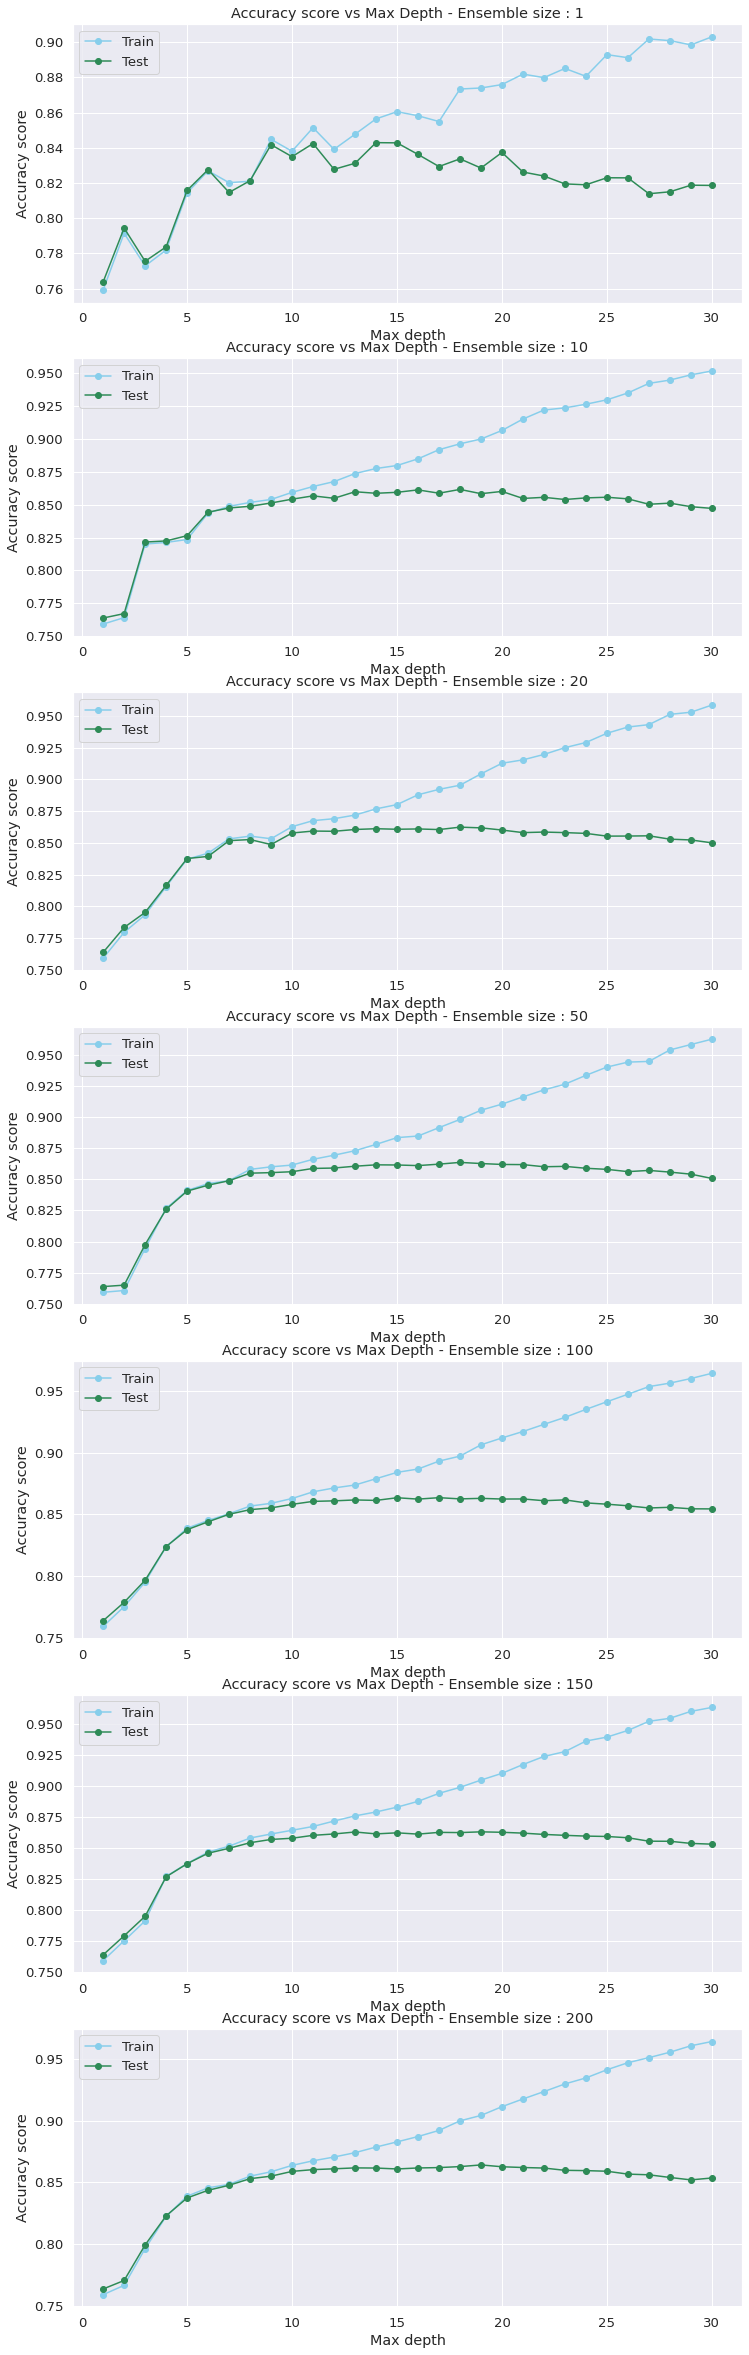

In [ ]:
ensemble_sizes = [1, 10, 20, 50, 100, 150, 200]

x = np.arange(30) + 1 # Create domain for plot

fig, axs = plt.subplots(len(ensemble_sizes), 1, figsize = (12, 6 * len(ensemble_sizes)))
training_time = []
test_scores = []
for i, n in enumerate(ensemble_sizes):
    # obtain test and train scores
    rf_scores = find_max_depth_rf(31, n)
    training_time.append(rf_scores[2])
    # Plot training score over domain
    axs[i].plot(x, rf_scores[0], label = "Train", color = "skyblue", marker = "o", markerfacecolor = "skyblue")
    # Plot testing accuracy over domain
    axs[i].plot(x, rf_scores[1], label = "Test", color = "seagreen", marker = "o", markerfacecolor = "seagreen")
    
    # Set sub-plot title and axis labels
    axs[i].set_title(f"Accuracy score vs Max Depth - Ensemble size : {n}")
    axs[i].set_xlabel("Max depth")
    axs[i].set_ylabel("Accuracy score")
    test_scores.append(max(rf_scores[1]))
    # add sub-plot legend
    axs[i].legend()
    axs[i].grid(True)
    
# add grid lines
#plt.grid(True)

plt.show()


*  What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?

    
  >The main difference between the two curves is that the decision tree classifier curve is smoother than the random forest classifier(ensemble size 1).

  >This is because a decision tree is built on an entire dataset, using all the features and among those features, using a particular criterion such as 'Gini impurity', it will determine the best feature as the root node. However, in Random Forest classifier, throughout the training process,
  whenever it is about to split a node, it do not consider all possible input features 𝑥1, . . . , 𝑥𝑝 as split features. In contrast, it selects a random subset consisting of 𝑞 ≤ 𝑝 entries, and consider only these 𝑞 variables. At the next split point, it draws a new random subset of 𝑞 entries to use as possible split features, and it carries on like that.

* What happens with the curve for random forests as the ensemble size grows?
  > As the ensemble size increases (number of trees in the forest), the accuracy score curve becomes smoother and more stable. This is because the accuracy score is averaged over a number of trees corresponding to the ensemble size which implies that each tree has less influence, making the score less irregular.


* What happens with the best observed test set accuracy as the ensemble size grows?

  > From the table below,we can see that after an ensemble size greater than or equal to 10,the accuracy on the best observed test set remain almost constant.


In [ ]:
data = {"Ensemble size":ensemble_sizes,"test_scores":np.round(test_scores,3)}
pd.DataFrame(data)

,Ensemble size,test_scores
0,1,0.843
1,10,0.862
2,20,0.862
3,50,0.864
4,100,0.863
5,150,0.863
6,200,0.864


* What happens with the training time as the ensemble size grows?


In [ ]:
train_time_rounded = np.round(training_time,2)

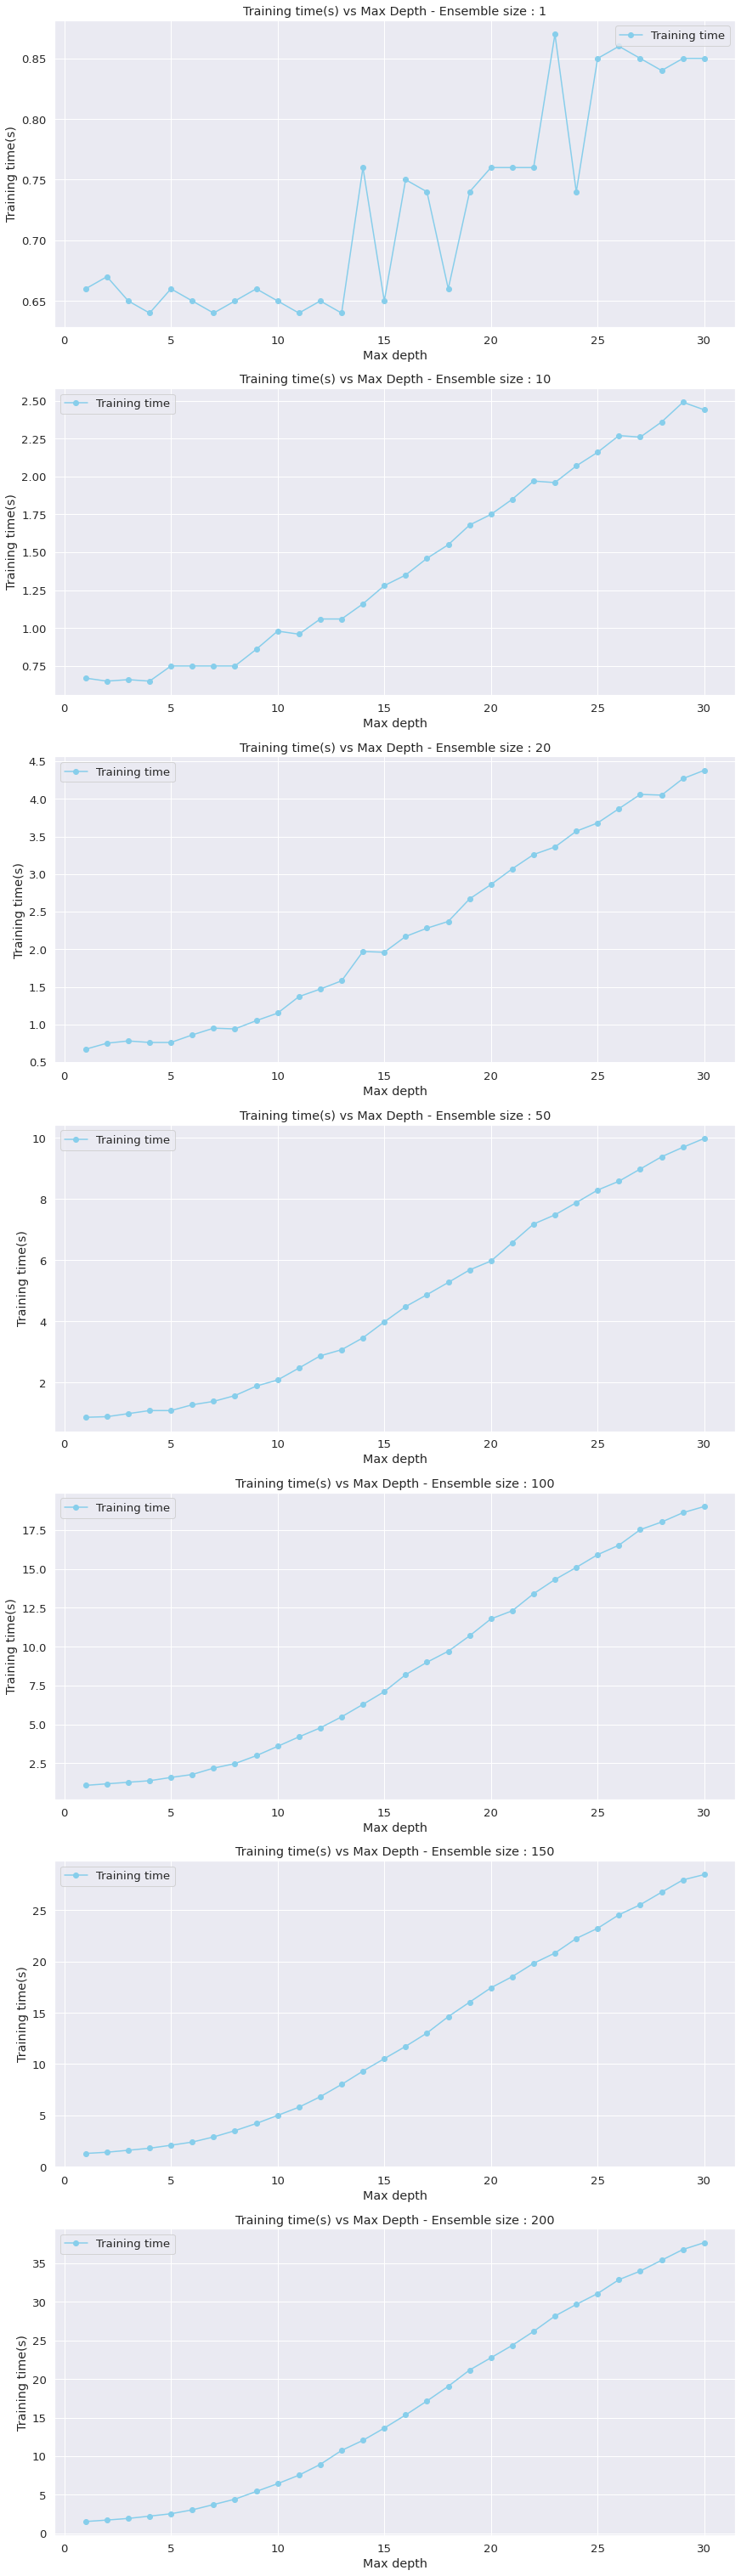

In [ ]:
ensemble_sizes = [1, 10, 20, 50, 100, 150, 200]

x = np.arange(30) + 1 # Create domain for plot

fig, axs = plt.subplots(len(ensemble_sizes), 1, figsize = (12, 6 * len(ensemble_sizes)))
for i, n in enumerate(ensemble_sizes):
    # obtain test and train scores
    # rf_scores = find_max_depth_rf(31, n)
    # training_time.append(rf_scores[2])
    # Plot training score over domain
    axs[i].plot(x, train_time_rounded[i], label = "Training time", color = "skyblue", marker = "o", markerfacecolor = "skyblue")
    # Plot testing accuracy over domain
   
    # Set sub-plot title and axis labels
    axs[i].set_title(f"Training time(s) vs Max Depth - Ensemble size : {n}")
    axs[i].set_xlabel("Max depth")
    axs[i].set_ylabel("Training time(s)")

    # add sub-plot legend
    axs[i].legend()
    
    # add grid lines
    axs[i].grid(True)
    #axs[i].grid(axis = "y")

plt.show()

> We can see that from  the above graphs that from ensemble sizes >= 10:
* Between max depth >= 10 and max depth <= 30, the training time increases linearly.

## Task 3: Feature importances in random forest classifiers

In [ ]:
pipeline = make_pipeline(DictVectorizer(), RandomForestClassifier(n_estimators = 200,max_depth =15,  n_jobs = -1))

In [ ]:
pipeline.fit(X_train.to_dict("records"), Y_train)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=15, n_estimators=200,
                                        n_jobs=-1))])

In [ ]:
feature_names = pipeline.steps[0][1].feature_names_

In [ ]:
f_importances = pipeline.steps[1][1].feature_importances_

In [ ]:
importance_df = pd.DataFrame(list(zip(feature_names, f_importances)), columns = [1, 2]).explode(2).reset_index(drop = True).add_prefix("column")

In [ ]:
importance_df.rename(columns = {"column1": "Feature Name", "column2": "Feature Importance"}, inplace = True)

In [ ]:
importance_df = importance_df.sort_values(by="Feature Importance", ascending = False).reset_index(drop=True)

In [ ]:
importance_df.head(5)

,Feature Name,Feature Importance
0,capital-gain,0.157619
1,marital-status=Married-civ-spouse,0.113885
2,education-num,0.103256
3,age,0.081300
4,relationship=Husband,0.075360


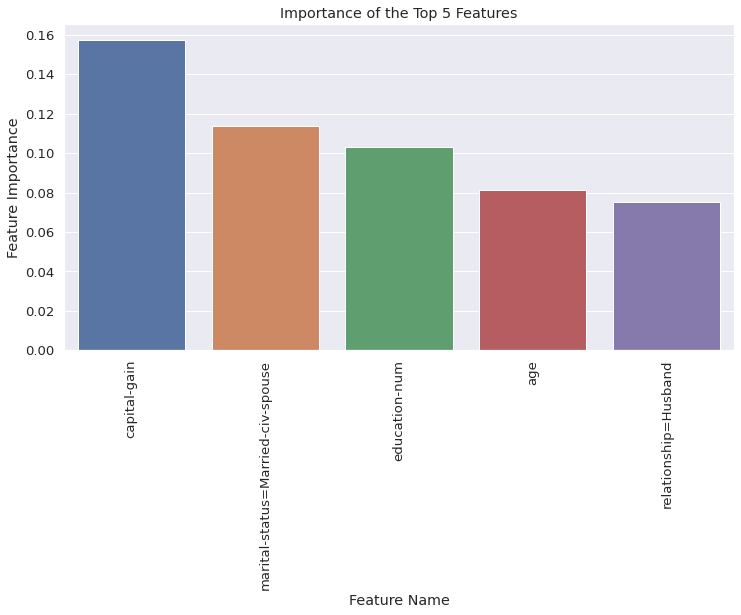

In [ ]:
# set figure size
plt.figure(figsize=(12, 6))

# create barplot
sns.barplot(x = importance_df.head(5)['Feature Name'], y = importance_df.head(5)['Feature Importance'])

# add plot title
plt.title("Importance of the Top 5 Features")

# rotate x-ticks 
plt.xticks(rotation = 90)

plt.show()

The importance score of individual features shows us which features are good at discriminating between the two labels in this data set based on predictions produced in the trees that comprise the random forest.

A high relevance score indicates that the Gini impurity is lower, which can be read as less likely that the model will wrongly label a data point for this characteristic. The following are the five most important features as evaluated by the importance score:

- *capital-gain*: The capital gain shows the profit from the sale of property or an investment. A large capital gain can suggest more wealth and, as a result, higher pay.

- *marital-status=Married-civ-spouse*: There is no apparent reason why being married to a civilian would result in higher income. However, this might be because there are more people with this marital status than the rest in this dataset.

- *education-num* - Education-num reflects a person's highest level of education. A person's education heavily influences the type of job and their income. In general, the higher the level of education, the higher the salary. A lack of education will almost always result in a reduced salary.

- *age*: On average, younger people earn less because they have less experience and education, and the elderly are likely to earn less due to diminishing health and cognitive capacities.

- *relationship=Husband*: On average, men are more likely to earn more than women. Most married people have the financial means to afford a wedding or get married, indicating a higher income. So being a husband would be advantageous.

We have to remember that these features may not necessarily correlate with having a high salary. Still, our model identifies these as the most essential factors in distinguishing between low or high salaried people.

In [ ]:
# cheking the distribution in marital status
train_df.groupby("marital-status").count()["target"]

marital-status
Divorced                  4443
Married-AF-spouse           23
Married-civ-spouse       14976
Married-spouse-absent      418
Never-married            10683
Separated                 1025
Widowed                    993
Name: target, dtype: int64

In [ ]:
# cheking the distribution in marital status
train_df.groupby(["marital-status", "target"]).count()

age  workclass  education  education-num  \
marital-status        target                                               
Divorced              <=50K    3980       3980       3980           3980   
                      >50K      463        463        463            463   
Married-AF-spouse     <=50K      13         13         13             13   
                      >50K       10         10         10             10   
Married-civ-spouse    <=50K    8284       8284       8284           8284   
                      >50K     6692       6692       6692           6692   
Married-spouse-absent <=50K     384        384        384            384   
                      >50K       34         34         34             34   
Never-married         <=50K   10192      10192      10192          10192   
                      >50K      491        491        491            491   
Separated             <=50K     959        959        959            959   
                      >50K       66         66         66             66   
Widowed               <=50K     908        908        908            908   
                      >50K       85         85         85             85   

                              occupation  relationship   race    sex  \
marital-status        target                                           
Divorced              <=50K         3980          3980   3980   3980   
                      >50K           463           463    463    463   
Married-AF-spouse     <=50K           13            13     13     13   
                      >50K            10            10     10     10   
Married-civ-spouse    <=50K         8284          8284   8284   8284   
                      >50K          6692          6692   6692   6692   
Married-spouse-absent <=50K          384           384    384    384   
                      >50K            34            34     34     34   
Never-married         <=50K        10192         10192  10192  10192   
                      >50K           491           491    491    491   
Separated             <=50K          959           959    959    959   
                      >50K            66            66     66     66   
Widowed               <=50K          908           908    908    908   
                      >50K            85            85     85     85   

                              capital-gain  capital-loss  hours-per-week  \
marital-status        target                                               
Divorced              <=50K           3980          3980            3980   
                      >50K             463           463             463   
Married-AF-spouse     <=50K             13            13              13   
                      >50K              10            10              10   
Married-civ-spouse    <=50K           8284          8284            8284   
                      >50K            6692          6692            6692   
Married-spouse-absent <=50K            384           384             384   
                      >50K              34            34              34   
Never-married         <=50K          10192         10192           10192   
                      >50K             491           491             491   
Separated             <=50K            959           959             959   
                      >50K              66            66              66   
Widowed               <=50K            908           908             908   
                      >50K              85            85              85   

                              native-country  
marital-status        target                  
Divorced              <=50K             3980  
                      >50K               463  
Married-AF-spouse     <=50K               13  
                      >50K                10  
Married-civ-spouse    <=50K             8284  
                      >50K              6692  
Married-spouse-absent <=50K              384  
                      

### **Permutation importance**

* By running a validation ste or out-of-bag(OOB) samples through random forest, a baseline accuracy is set in case of a classifier or an R2 score is recorded if it is a regression.

* The column values of a given predictor feature are permuted and all the test samples are passed back through Random Forest, the accuracy or R2 score is recalculated

* By permuting the column,the difference between the baseline and drop in overall accuracy or R2 will determine the importance of that feature

* Despite permutation mechanisms being much more computationally expensive,they produce more reliable results

### **Drop-column importance**

* Permutation importance does not necessitate retraining the underlying model to measure the effect of permutating the variables on the overall accuracy of the model. Retraining the model would be computationally expensive,however if we ignore the cost of the later, using a brute force
drop-column importance strategy can give the most accurate feature importance. 

* The main idea idea to obtain a baseline a performance similar to permutation,however this time, the column is fully dropped, the model is retrained and the performance score is recalculated.


* The feature importance would be the difference between the baseline and recalculated performance score from the model after dropping the feature. This mechanism allows us to know how the importance of a feature is to the global performance of the model in a more direct way than permutation importance mechanishm

